In [1]:
import nltk
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
%matplotlib inline
import matplotlib as plt
import pandas as pd
plt.rcParams['figure.figsize'] = (12,4)

In [2]:
speakers = PlaintextCorpusReader('sp/', '.*')
books = PlaintextCorpusReader('bk/', '.*')

In [50]:
def makeCFD(corpus): 
    return nltk.ConditionalFreqDist(
           (target, fileid)
           for fileid in corpus.fileids()
           for w in corpus.words(fileid)
           for target in ['pre', 'un', 're', 'dis']
           if w.lower().startswith(target))

In [51]:
speakerCFD = makeCFD(speakers)
bookCFD = makeCFD(books)

In [52]:
speakerWordCounts = {char: len(speakers.words(char)) for char in speakers.fileids()}
bookWordCounts = {book: len(books.words(book)) for book in books.fileids()}

In [53]:
def normalizeCFD(cfd, counts): 
    # Adjust for each character's total words
    newcfd = cfd # make a copy
    for word in newcfd: 
        for char in newcfd[word]:
            newcfd[word][char] = newcfd[word][char] / counts[char]
    return newcfd

In [47]:
normalizeCFD(bookCFD, bookWordCounts)

ConditionalFreqDist(nltk.probability.FreqDist,
                    {'dis': FreqDist({'book01.txt': 0.0024725274725274724,
                               'book02.txt': 0.0027331020708504152,
                               'book03.txt': 0.003320820098180768,
                               'book04.txt': 0.003369839932603201,
                               'book05.txt': 0.004560729716754681,
                               'book06.txt': 0.004544896204397494,
                               'book07.txt': 0.002264808362369338,
                               'book08.txt': 0.0037093238914179733,
                               'book09.txt': 0.0037827614158335585,
                               'book10.txt': 0.003413968006242684,
                               'book11.txt': 0.003010597302504817,
                               'book12.txt': 0.002708650753343491}),
                     'pre': FreqDist({'book01.txt': 0.0017857142857142857,
                               'book02.txt': 0.00199726689792

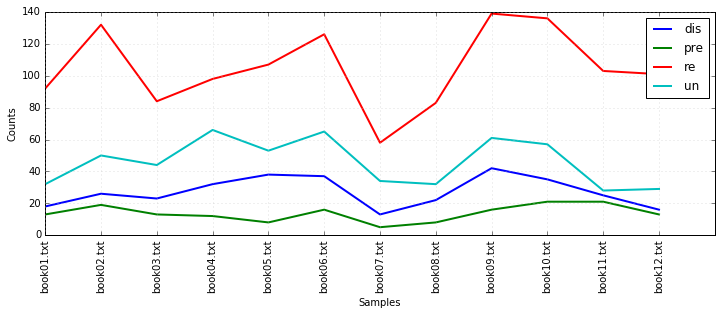

In [54]:
bookCFD.plot()